# 타이타닉 생존율 분석 해보기
## 상관분석, 상관 계수, 피어슨 상관 계수, 히트맵 
### 타이타닉 데이터 seaborn 내장 데이터 셋 
### 전처리 비슷하게, null  값을 , 최빈값(가장 빈도가 높은 데이터), 중앙값 대체 
### 파이 차트, 갯수 차트, 히트맵, 시각화 
### 1) 모든 변수 간 상관계수 구하고, 2) 지정한 두 변수 간 상관계수도 구하기. 

## 용어정리 
### 상관 분석 : 두 변수가 어떤 선형적 관계에 있는지 분석 하는 방법. 
### 두 변수의 관계의 강도를 상관관계라고 함. 
### 상관관계의 정도를 나타내는 단위를 모상관 계수 p(파이)를 사용함. by 위키피디아 

### 단순 상관 분석: 두 변수 사이의 어느 정도 강한 관계 인지. 
### 다중 상관 분석 : 세 개이상의 변수 간 관계의 강도를 측정. 

### 상관계수 : + , - , 독립변수가, 종속 변수에 어떠한 영향을 미치는지, 
### x 증가시, y도 증가하는지, 아니면 감소하는지? 
### 이번에는 수치를 구간을 나눠서, 어느정도 연관성이 있는지 수치화해서, 예측하기. 

### 피어슨 상관계수 : 많이 사용하는 예제다. 
### ex) 0.0 ~ 0.2 : 상관관계가 거의 없다. 
### ex) 0.2 ~ 0.4 : 약한 상관관계가 있다. 
### ex) 0.4 ~ 0.6 : 상관관계가 있다. 
### ex) 0.6 ~ 0.8 : 강한 상관관계가 있다. 
### ex) 0.8 ~ 1.0 : 매우 강한 상관관계가 있다. 


In [1]:
# pclass
# # 탑승권 등급을 나타냅니다.
# 1: 1등실, 2: 2등실, 3: 3등실

# sibsp
# 함께 탑승한 형제자매(siblings)와 배우자(spouse)의 수
# 예: 1이면 형제나 배우자 중 1명이 함께 탑승했다는 뜻

# parch
# 함께 탑승한 부모(parents)와 자녀(children)의 수
# 예: 2이면 부모나 자녀 중 2명이 함께 탑승했다는 뜻

# embarked
# 승선(탑승)한 항구를 의미합니다.
# 일반적으로 C(Cherbourg), Q(Queenstown), S(Southampton) 세 가지 값이 사용됩니다.

# class
# pclass를 문자 형태로 표현한 것(‘First’, ‘Second’, ‘Third’ 등).

# who
# 탑승객을 ‘man’, ‘woman’, ‘child’로 구분한 범주형 변수.
# 나이와 성별을 함께 고려하여 어린이인지 성인 남성/여성인지 표시합니다.

# deck
#
# 객실이 위치한 갑판(Deck) 정보(A, B, C, D, E, F, G, T 등).
# 데이터가 누락된 경우(NaN)도 많습니다.

# embark_town
# 실제 도시 이름(‘Cherbourg’, ‘Queenstown’, ‘Southampton’)을 표시합니다.

# alone
#
# 혼자 탑승했는지(True/False) 여부를 나타냅니다.
# sibsp + parch가 0이면 True, 그렇지 않으면 False

# 데이터 수집
import seaborn as sns 
import pandas as pd 
titanic = sns.load_dataset("titanic")
print(titanic.head())
titanic.to_csv("./titanic_2.csv", index=False)

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [3]:
# 데이터 준비 
# 비어 있는 컬럼들 조사 (결측값, 누락된값):
# age, embarked, deck , embark_town 
# 정확한 분석이 어렵기 때문에, 대체 값으로 채울 예정. 
# age -> 중앙값으로 값을 대체, embarked, deck , embark_town : 최빈값()으로 대체 하자. 
# 임의로 정했음. (룰을 임의로 정함, 데이터가 부족하거나, 표본 집단을 정하는 경우도 많음.)
# 최빈값 : 예) 카테고리  suv(70개) , 승용차(100개) , 전기차(30개) -> 승용차 최빈값.  

# titanic , 메모리 상에 있는 데이터를 기본 조사, 널 조사. 
titanic.isnull().sum()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# age, embarked, deck , embark_town 
# 정확한 분석이 어렵기 때문에, 대체 값으로 채울 예정. 
# age -> 중앙값으로 값을 대체, 
# titanic['age'].median() : 중앙값
# fillna 함수 이용해서, null 값에 , 해당 인자값 , 중앙값으로 채우기. 
# 다신, age 컬럼에 비어있는 값에, 중앙값으로 채우기. 
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
# 결과 확인. 
titanic.isnull().sum()

# embarked, deck , embark_town : 최빈값()으로 대체 하자.
# embarked 컬럼의 최빈값 조사 -> S    644 , 사용
embarked = titanic["embarked"].value_counts()
print(f"embarked : \n {embarked}")

# deck -> C    747 ,당첨
deck = titanic["deck"].value_counts()
print(f"deck : \n {deck}")

# # embark_town -> Southampton    644, 당첨
embark_town = titanic["embark_town"].value_counts()
print(f"embark_town : \n {embark_town}")
#
# # 조사 후 , 해당 값으로 , 컬럼의 빈값에, 대체 하기.
titanic["embarked"] = titanic["embarked"].fillna("S")
titanic["deck"] = titanic["deck"].fillna("C")
titanic["embark_town"] = titanic["embark_town"].fillna("Southampton")
#
# # 다시, 결측값 조사.
# # 결과 확인.
titanic.isnull().sum()



embarked : 
 embarked
S    644
C    168
Q     77
Name: count, dtype: int64
deck : 
 deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64
embark_town : 
 embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [5]:
# 데이터 탐색. 
# info 함수 이용해서, 기본 정보 확인. 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# 종속 변수 survived, 생존자 수를 확인. 
# 답이 있어요. 지도 학습. 
# 사망자: 549명, 생존자: 342명. 
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

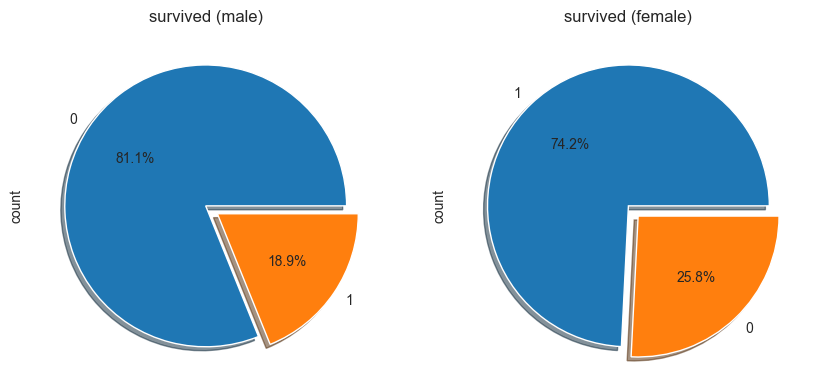

In [7]:
# 기본적인 차트 그리기, 시각화 하기. 
import matplotlib.pyplot as plt 
f, ax = plt.subplots(1,2, figsize= (10,5))

# 시각화 속성 옵션 설정하기.
# titanic['survived']
#
# 타이타닉 데이터프레임에서 ‘survived’ 열(시리즈)만 추출합니다.
# 이 열은 탑승객의 생존 여부(0: 사망, 1: 생존)를 담고 있습니다.

# [titanic["sex"] =='male']
#
# ‘sex’ 열에서 값이 ‘male’인 행만 필터링합니다.
# 즉, 남성 승객들의 ‘survived’ 데이터만 선택하게 됩니다.

# .value_counts()
#
# 남성 승객의 ‘survived’ 값(0 또는 1)이 각각 몇 명인지 빈도수를 계산합니다.
# 예: 0 468 / 1 109 형태로 생존/사망자 수를 세어 반환합니다.

# .plot.pie(...)
#
# 계산된 빈도수를 이용해 파이 차트를 그립니다.
# 파라미터:
# explode = [0, 0.1]:
# 파이 차트의 각 조각을 중심에서 얼마나 떨어뜨릴지 결정합니다.
# 첫 번째 조각(0)은 그대로 두고, 두 번째 조각(0.1)은 약간 분리되어 표시됩니다.

# autopct = "%1.1f%%":
# 파이 차트 조각에 표시되는 백분율의 형식을 지정합니다. 여기서는 소수점 첫째 자리까지 표현됩니다. (예: 23.4%)

# ax = ax[0]:
# 미리 생성된 서브플롯 배열(ax)의 첫 번째 축(ax[0])에 파이 차트를 그립니다.
# 여러 그래프를 한 Figure에 그릴 때 사용합니다.

# shadow = True:
# 파이 차트에 그림자를 추가하여 시각적 입체감을 줍니다.
titanic['survived'][titanic["sex"] =='male'].value_counts().plot.pie(explode = [0,0.1], autopct = "%1.1f%%", ax = ax[0], shadow = True)

# 시각화 속성 옵션 설정하기. 
titanic['survived'][titanic["sex"] =='female'].value_counts().plot.pie(explode = [0,0.1], autopct = "%1.1f%%", ax = ax[1], shadow = True)

# 제목 
ax[0].set_title("survived (male)")
ax[1].set_title("survived (female)")

plt.show()



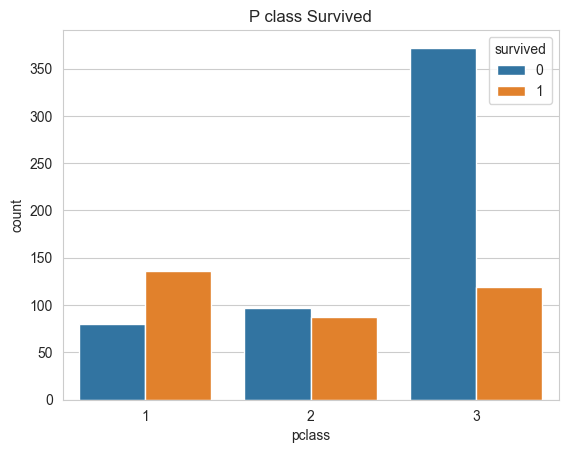

In [8]:
# 객실 등급별 생존자수 차트 그리기. hue = 속성, 종속변수
sns.countplot( x= "pclass", hue="survived", data=titanic)
plt.title("P class Survived")
plt.show()

In [9]:
# 데이터 모델링 
# 상관 분석은 , pandas 에서 제공하는 corr() 함수 이용하고, 
# 상관 계수 : 피어슨 상관계수를 이용.
# titanic.info()
# 문제점, 해당 데이터 프레임에 숫자가 아닌 문자열이 포함이 되어서, 변환을 못한다는 에러 
# 확인 시에는 알아서, 해당 숫자 컬럼만 선택을 했었는데, 다시, 기존 코드부분 확인하니. 
# 되었던 코드도 안되는 상황이라서, 
# chat gpt에게, corr 함수 속성에서, 숫자 부분만 선택하는 부분을 질문에 답을 받아서, 수정. 

# titanic_corr = titanic.corr(method = 'pearson')
# 해결책 -> 해당 데이터 프레임에서, 숫자 부분 컬럼만 가져오기. 
import numpy as np
numeric_titanic = titanic.select_dtypes(include=[np.number])
# 숫자 필드로만 구성된 데이터 프레임 확인. 
# numeric_titanic 
titanic_corr = numeric_titanic.corr(method = 'pearson')
titanic_corr

# csv 파일로 변환 
titanic_corr.to_csv("./titanic_corr.csv", index=False)


In [10]:
# 특정 변수의 상관관계 분석 해보기. adult_male
adult_male_corr = titanic["survived"].corr(titanic["adult_male"])
print(f"adult_male_corr : \n {adult_male_corr}")
# 특정 변수의 상관관계 분석 해보기. fare
fare_corr = titanic["survived"].corr(titanic["fare"])
print(f"fare_corr : \n {fare_corr}")

adult_male_corr : 
 -0.5570800422053259
fare_corr : 
 0.2573065223849622


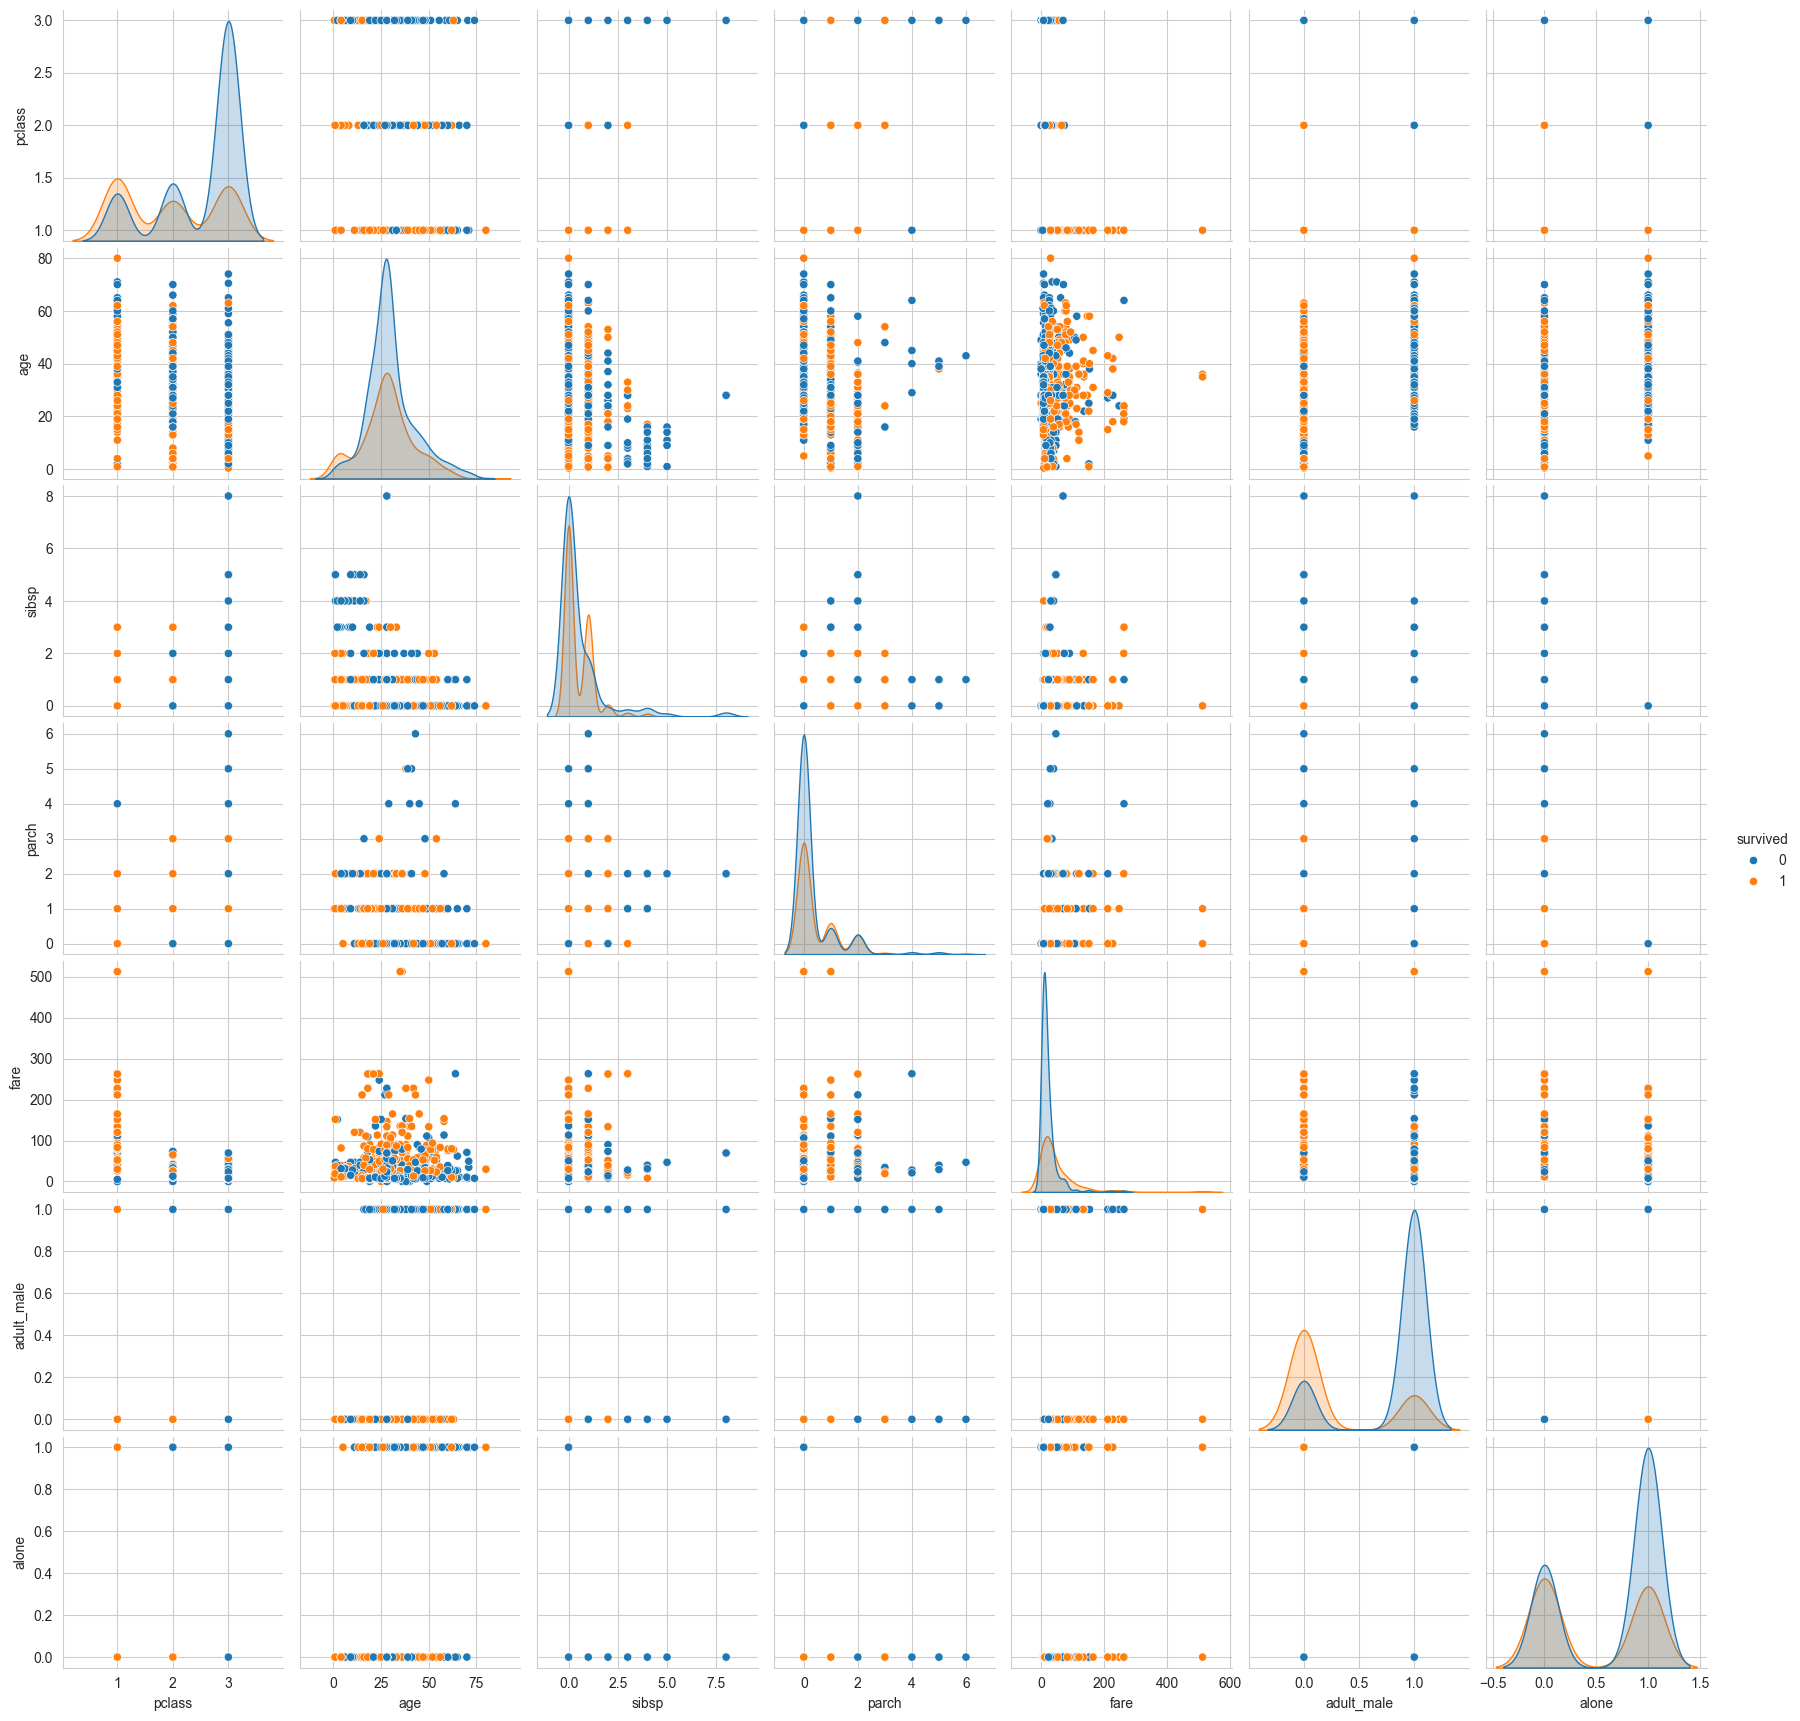

In [10]:
# 시각화 해보기. 
# seaborn 패키지의 pairplot() 이용해서 시각화
# pairplot -> 그리드(표) 형태로 각 데이터 열의 조합을 산점도(scatter plot)로 그린다. 
# 같은 데이터가 만나는 대각선 부분은 히스토 그램으로 그리기. 

sns.pairplot(titanic, hue="survived")
plt.show()

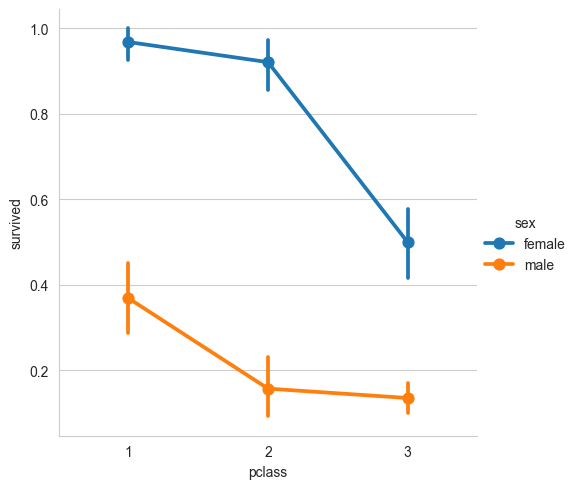

In [11]:
# 두 개의 변수의 상관관계 차트 그리기. 
sns.catplot(x="pclass", y="survived", hue= "sex", data=titanic, kind="point")
plt.show()

In [11]:
# 히트 맵으로 시각화하기. 
# 각 변수들에 대해서, 상관 관계 계수를, 해당 영역에 온도로 표시를 함. 
# 관련이 높을 수록, 뜨거운 온도를 빚대어서, 빨간색으로 표시, 음의 상관 관계이면, 파란색으로 

# 변수 중에 age : 나이 구간별로, 카테고리 작업해서, 시각화를 용이하게 할려고.
# 10 살 미만 : 카테고리 0
# 10 살 이상 ~ 20살 미만 : 카테고리 1
# 20 살 이상 ~ 30살 미만 : 카테고리 2
# 30 살 이상 ~ 40살 미만 : 카테고리 3
# 40 살 이상 ~ 50살 미만 : 카테고리 4
# 50 살 이상 ~ 60살 미만 : 카테고리 5
# 60 살 이상 ~ 70살 미만 : 카테고리 6
# 80 살 이상 ~ : 카테고리 7

def catogoryAge(x):
  if x < 10:
    return 0
  elif x <20:
    return 1
  elif x <30:
    return 2
  elif x <40:
    return 3
  elif x <50:
    return 4
  elif x <60:
    return 5
  elif x <70:
    return 6
  else:
    return 7

# 새로운 카테고리 컬럼 categoryAge => age2
titanic['age2'] = titanic["age"].apply(catogoryAge)

# 성비도 문자열에서, 남자 : 1, 여자 : 0 
titanic["sex"] = titanic["sex"].map({"male" : 1, "female" : 0})

# 가족의 수를 따로 컬럼을 추가하기. family
# sibsp : 형제 자매, 배우자 , parch: 부모, 어린이 
titanic["family"] = titanic["sibsp"] + titanic["parch"] + 1

# 새로운 데이터를 csv 파일로 변환 
titanic.to_csv("./titanic_new_family.csv", index=False)

   survived  sex  age2  family  pclass     fare
0         0    1     2       2       3   7.2500
1         1    0     3       2       1  71.2833
2         1    0     2       1       3   7.9250
3         1    0     3       2       1  53.1000
4         0    1     3       1       3   8.0500


<Axes: >

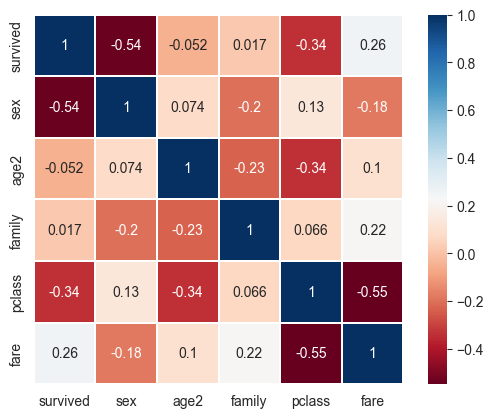

In [12]:
# 데이터를 새로 변경 후, 히트맵 그리기 
heatmap_data = titanic[["survived", "sex", "age2", "family", "pclass","fare"]]
print(heatmap_data.head())
colormap = plt.cm.RdBu

# heatmap_data.astype(float):
# 데이터의 타입을 float로 변환합니다. (문자열 등 다른 타입이 섞여 있을 경우 문제 발생을 방지하기 위함)
# .corr():
# 변환된 데이터에 대해 상관계수 행렬을 계산합니다.

# linewidths=0.1
# 각 셀(상관계수 값이 들어있는 사각형) 사이에 0.1 포인트 두께의 선을 그립니다.
#
# vmax=1.0
# 색상 스케일의 최대값을 1.0으로 고정합니다. 상관계수의 최대 값인 1에 해당하는 색상을 지정합니다.
#
# square=True
# 각 셀을 정사각형 모양으로 만듭니다. (세로와 가로 길이를 동일하게)
#
# cmap=colormap
# 사용자가 미리 정의한 colormap(색상 팔레트)을 적용합니다.
# (예: 'coolwarm', 'viridis' 등과 같이 색상 팔레트를 지정할 수 있습니다.)
#
# linecolor="white"
# 셀 경계선을 흰색으로 설정합니다.
#
# annot=True
# 각 셀 안에 상관계수 값을 텍스트로 표시합니다.
#
# annot_kws={"size": 10}
# 텍스트(상관계수) 표시 시 폰트 크기를 10으로 지정합니다.
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax= 1.0 , square=True, cmap = colormap, linecolor="white", annot = True, annot_kws={"size": 10})
# 해석
# survived(생존 여부)와 sex(성별) 간 상관(-0.54)
# 음의 상관계수가 크다는 것은, 성별이 ‘남성(1)’일수록 생존(1)과 반대로 움직이는 경향이 강함을 의미합니다.
# 즉, 남성보다는 여성이 생존 확률이 높았음을 시사합니다

# survived와 pclass(티켓 등급) 간 상관(-0.34)
# 등급 숫자가 높을수록(3등급) 생존율이 낮아지는 경향을 나타냅니다.
# 즉, 1등급에 가까울수록(숫자가 작을수록) 생존 가능성이 커집니다.